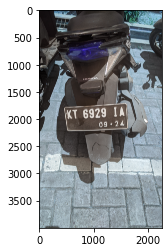

In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = 'rl2.jpg'
img = cv2.imread(path)
plt.imshow(img)

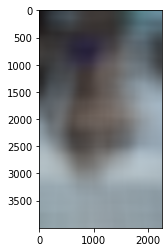

In [117]:
blurred_img = cv2.blur(img, (int(img.shape[0]/7),int(img.shape[0]/7)))
plt.imshow(blurred_img)

In [118]:
img.shape

(4000, 2248, 3)

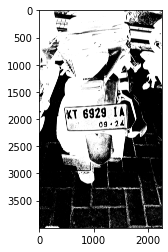

In [119]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

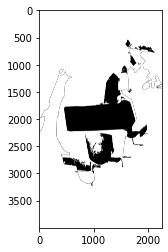

In [120]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[-2], key=cv2.contourArea)[-1]
mask = np.full(img.shape, 255, np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 0, -1)
plt.imshow(masked, cmap='gray')

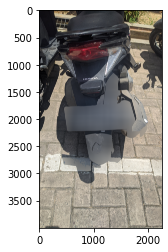

In [121]:
out = np.where(masked==np.array([255]), img, blurred_img)
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out)


In [122]:
plt.imsave('result.png', out)